Prediction WD ( ทิศทางลม )

In [2]:
import pandas as pd

hatyai = "Clean_Data/Clean_data44t_Hatyai.csv"
df = pd.read_csv(hatyai)
df = df.set_index('DATETIMEDATA')

droped_column = ['Unnamed: 0.1','Unnamed: 0']
df = df.drop(columns=droped_column)
df

,PM25,WS,TEMP,RH,WD
DATETIMEDATA,,,,,
2024-01-01 00:00:00,16.5,1,27,79,115
2024-01-01 01:00:00,33.6,1,27,82,97
2024-01-01 02:00:00,34.2,1,26,84,96
2024-01-01 03:00:00,20.1,1,26,82,108
2024-01-01 04:00:00,16.5,1,27,79,106
...,...,...,...,...,...
2024-03-07 19:00:00,16.4,1,30,64,109
2024-03-07 20:00:00,23.3,1,30,67,106
2024-03-07 21:00:00,20.2,1,29,69,104


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1608 entries, 2024-01-01 00:00:00 to 2024-03-07 23:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    1608 non-null   float64
 1   WS      1608 non-null   int64  
 2   TEMP    1608 non-null   int64  
 3   RH      1608 non-null   int64  
 4   WD      1608 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 75.4+ KB


In [4]:
df.describe()

,PM25,WS,TEMP,RH,WD
count,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000
mean,18.046642,0.899254,27.011816,65.381219,128.976368
std,5.247709,0.463798,7.148647,19.968041,46.639097
min,5.300000,0.000000,0.000000,0.000000,0.000000
25%,14.375000,1.000000,27.000000,57.000000,107.000000
50%,17.650000,1.000000,28.000000,71.000000,121.000000
75%,21.000000,1.000000,30.000000,78.000000,156.000000
max,43.400000,3.000000,36.000000,97.000000,253.000000


In [5]:
%pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [6]:
from pycaret.regression import *
s = setup(df, target = 'WD', session_id = 123)

,Description,Value
0,Session id,123
1,Target,WD
2,Target type,Regression
3,Original data shape,"(1608, 5)"
4,Transformed data shape,"(1608, 5)"
5,Transformed train set shape,"(1125, 5)"
6,Transformed test set shape,"(483, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [7]:
best = compare_models()

In [8]:
print(best)

GradientBoostingRegressor(random_state=123)


In [9]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

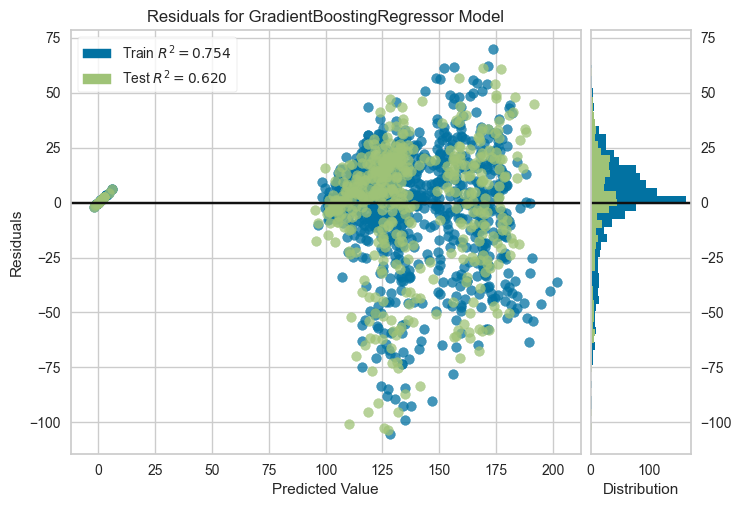

In [10]:
plot_model(best, plot = 'residuals')

In [11]:
mymodel = s.create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19.6327,739.8766,27.2007,0.5930,0.3025,0.1382
1,19.2877,806.3288,28.3959,0.6645,0.3461,0.1372
2,20.5406,818.3721,28.6072,0.5995,0.2996,0.1460
3,19.1962,806.0899,28.3917,0.6238,0.3385,0.1439
4,16.5051,601.8181,24.5320,0.6764,0.2133,0.1259
5,15.7448,588.2012,24.2529,0.7182,0.3758,0.1254
6,16.7659,540.6146,23.2511,0.7123,0.2871,0.1257
7,18.2062,667.8371,25.8425,0.6813,0.3510,0.1433
8,19.0648,722.9317,26.8874,0.7730,0.3936,0.1445


In [12]:
evaluate_model(mymodel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
tuned_model = s.tune_model(mymodel)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,21.8273,815.6593,28.5597,0.5513,0.6884,0.1430
1,21.5013,922.4487,30.3718,0.6161,0.8265,0.1388
2,22.1383,877.9549,29.6303,0.5704,0.7621,0.1444
3,20.8603,831.2470,28.8314,0.6121,0.8985,0.1412
4,18.1794,684.9143,26.1709,0.6317,0.7553,0.1263
5,18.1870,653.5290,25.5642,0.6868,0.9551,0.1286
6,19.3270,629.1259,25.0824,0.6651,0.7608,0.1344
7,20.3419,689.6737,26.2616,0.6709,0.9521,0.1421
8,22.2714,884.2865,29.7370,0.7224,1.1545,0.1396


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [12]:
holdout_pred = s.predict_model(tuned_model, verbose=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,20.0658,782.4957,27.9731,0.6196,0.2730,0.1450


In [13]:
holdout_pred

,PM25,WS,TEMP,RH,WD,prediction_label
DATETIMEDATA,,,,,,
2024-02-28 11:00:00,16.100000,1,33,50,204,185.144856
2024-02-28 15:00:00,16.299999,1,33,52,198,177.201233
2024-02-13 20:00:00,19.200001,1,28,70,131,133.034034
2024-01-17 22:00:00,16.600000,1,28,70,183,136.905211
2024-03-02 18:00:00,21.100000,1,29,69,155,134.918084
...,...,...,...,...,...,...
2024-02-14 06:00:00,15.200000,1,26,82,132,110.164878
2024-02-22 03:00:00,13.400000,0,26,83,114,105.009400
2024-01-04 13:00:00,15.400000,1,33,48,135,183.198890


In [14]:
final_model = s.finalize_model(tuned_model)

In [15]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming your data is stored in a DataFrame called df_train
endog = df['WD']  # Endogenous variable (target variable)
exog = df[['WS', 'TEMP', 'RH', 'PM25']]  # Exogenous variables

# Define and train the SARIMAX model
model = SARIMAX(endog, exog=exog, order=(1, 0, 1), seasonal_order=(1, 1, 1, 24))
result = model.fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.33094D+00    |proj g|=  8.80668D-02


 This problem is unconstrained.



At iterate    5    f=  4.27441D+00    |proj g|=  2.95748D-02

At iterate   10    f=  4.22237D+00    |proj g|=  1.84069D-02

At iterate   15    f=  4.21829D+00    |proj g|=  5.64625D-03

At iterate   20    f=  4.21813D+00    |proj g|=  6.32802D-04

At iterate   25    f=  4.21810D+00    |proj g|=  2.27092D-03

At iterate   30    f=  4.21809D+00    |proj g|=  1.64594D-03

At iterate   35    f=  4.21792D+00    |proj g|=  2.16987D-03

At iterate   40    f=  4.21788D+00    |proj g|=  7.92812D-04

At iterate   45    f=  4.21784D+00    |proj g|=  5.98839D-04

At iterate   50    f=  4.21771D+00    |proj g|=  5.45766D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [16]:
# Set the forecast horizon
forecast_horizon = 840  # Forecast horizon of 48 hours

# Assuming you have the 'result' and 'exog' dataframes defined

# Perform the forecast
forecast = result.forecast(steps=forecast_horizon, exog=exog.iloc[-forecast_horizon:])

# Extract the last datetime value from the train.csv DataFrame
last_datetime = df.index[-1]

# Define the date you want to start the forecast from
start_date = '2024-03-09'  # Example: 'YYYY-MM-DD'

# Create a new datetime index for the forecast DataFrame
forecast_index = pd.date_range(start=start_date, periods=forecast_horizon, freq='H')

# Create a DataFrame with forecasted values and the new datetime index
forecast_df = pd.DataFrame({'DATETIMEDATA': forecast_index, 'PREDICTION_WD': forecast})

# Display the forecast DataFrame
forecast_df


,DATETIMEDATA,PREDICTION_WD
2024-03-08 00:00:00,2024-03-09 00:00:00,99.546873
2024-03-08 01:00:00,2024-03-09 01:00:00,103.883509
2024-03-08 02:00:00,2024-03-09 02:00:00,100.100250
2024-03-08 03:00:00,2024-03-09 03:00:00,103.048541
2024-03-08 04:00:00,2024-03-09 04:00:00,101.412900
...,...,...
2024-04-11 19:00:00,2024-04-12 19:00:00,143.503336
2024-04-11 20:00:00,2024-04-12 20:00:00,137.354202
2024-04-11 21:00:00,2024-04-12 21:00:00,128.386309
2024-04-11 22:00:00,2024-04-12 22:00:00,120.367297


In [17]:
# แปลงข้อมูลรายชั่วโมงเป็นรายวัน
forecast_df_daily = forecast_df.resample('D', on='DATETIMEDATA').mean()

# แสดง DataFrame ที่แปลงรายชั่วโมงเป็นรายวัน
forecast_df_daily

,PREDICTION_WD
DATETIMEDATA,
2024-03-09,128.969449
2024-03-10,133.622497
2024-03-11,134.528606
2024-03-12,133.608403
2024-03-13,134.844520
2024-03-14,134.579579
2024-03-15,135.026931
2024-03-16,134.690604
2024-03-17,133.445724


In [18]:
forecast_df_daily.to_csv('predict_day_WD.csv')